In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from googleapiclient.discovery import build

In [3]:
plt.style.use("ggplot")
import nltk


In [4]:
from googleapiclient.discovery import build
import pandas as pd

api_key = 'your API'

def video_comments_to_dataframe(video_id):
    # Create empty lists to store data
    user_ids = []
    comments = []
    likes = []
    dislikes = []
    reply_counts = []

    # Create a YouTube API client
    youtube = build('youtube', 'v3', developerKey=api_key)

    # Retrieve YouTube video comments
    video_response = youtube.commentThreads().list(
        part='snippet,replies',
        videoId=video_id
    ).execute()

    # Iterate through video response
    while video_response:
        for item in video_response['items']:
            # Extract comment snippet
            snippet = item['snippet']['topLevelComment']['snippet']

            # Extract information
            user_id = snippet['authorDisplayName']
            comment = snippet['textDisplay']
            like_count = snippet['likeCount']

            reply_count = item['snippet']['totalReplyCount']

            # Append data to lists
            user_ids.append(user_id)
            comments.append(comment)
            likes.append(like_count)

            reply_counts.append(reply_count)

        # Fetch the next page of comments
        if 'nextPageToken' in video_response:
            video_response = youtube.commentThreads().list(
                part='snippet,replies',
                videoId=video_id,
                pageToken=video_response['nextPageToken']
            ).execute()
        else:
            break

    # Create a DataFrame
    df = pd.DataFrame({
        'User ID': user_ids,
        'Comments': comments,
        'Likes': likes,

        'Replies': reply_counts
    })

    return df

# Enter video id
video_id = "unU9vpLjHRk"

# Call the function and get the DataFrame
comments_df = video_comments_to_dataframe(video_id)

# Print the DataFrame
print(comments_df)


                  User ID                                           Comments  \
0                Joy Bell  I THINK YOU ARE THE DAVID COPPER FIELD OF THE ...   
1              Ryan Menez                            Obrigada pela motivação   
2             チビとみんなの名言物語  I will one day become an extraordinary entrepr...   
3              Robyn Hope  This is such idiotic advice..I hope nobody fol...   
4               Favecraft              The best elon musk Motivationen Video   
...                   ...                                                ...   
2105        Selfdeveloped  People don&#39;t understand that when I grew u...   
2106  Motivated Mentality  If you&#39;re not taking steps forward you&#39...   
2107                meto.                              This man is a legend.   
2108            Ugallimbu                                              😎😎😎😎😎   
2109           Ray Mafoko  Watching all the way from Botswana, Africa. Th...   

      Likes  Replies  
0         0     

In [5]:
len(comments_df)

2110

In [6]:

len(comments_df['Likes'])

2110

In [7]:
a = comments_df['Likes'].value_counts().sort_index()

bins = [0, 1,2,3,4,5,6,10,50, 100, float('inf')]
labels = ['0','1','2','3','4','5','6-10', '10-50','50-100' ,'Above 100']
comments_df['Likes_Category'] = pd.cut(comments_df['Likes'], bins=bins, labels=labels, right=False)
like_counts = comments_df['Likes_Category'].value_counts().sort_index()
print(like_counts)


Likes_Category
0            1526
1             260
2              86
3              41
4              28
5              22
6-10           47
10-50          55
50-100         12
Above 100      33
Name: count, dtype: int64


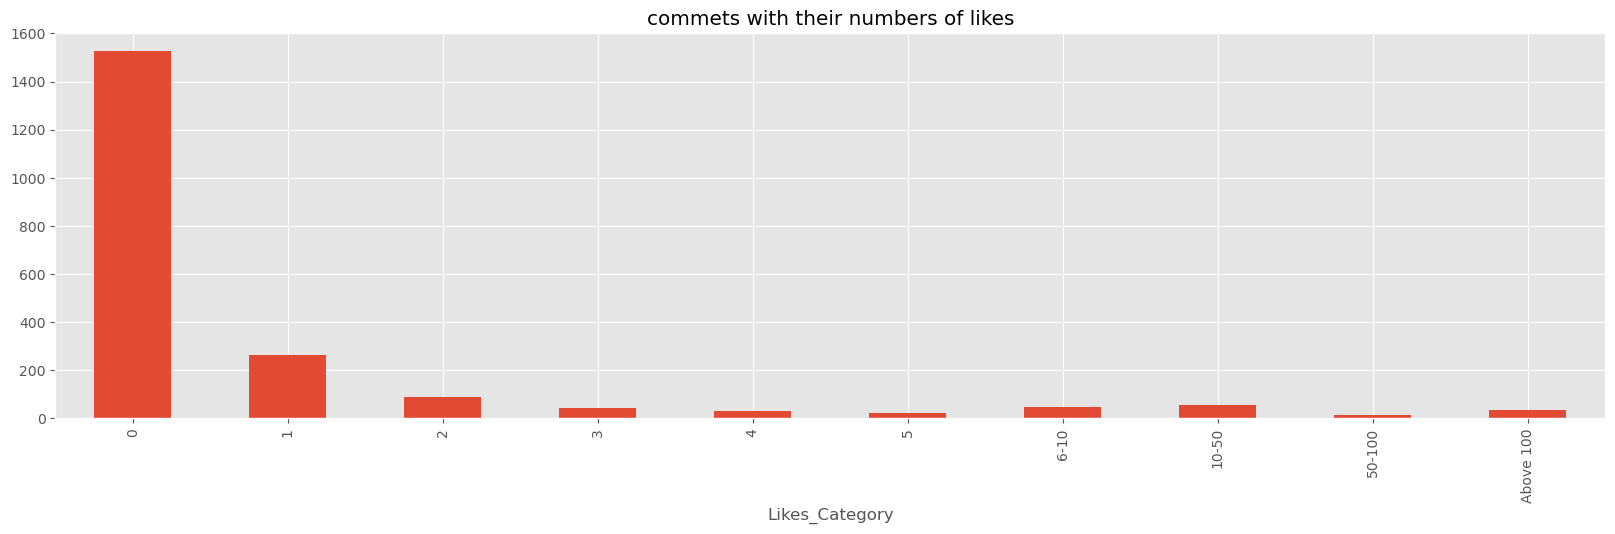

In [8]:
ax = like_counts.plot(kind='bar',
          title='commets with their numbers of likes',
          figsize=(20, 5))


# Show the plot
plt.show()

In [59]:
np.mean(like_counts)

211.0

In [9]:
comments_df

,User ID,Comments,Likes,Replies,Likes_Category
0,Joy Bell,I THINK YOU ARE THE DAVID COPPER FIELD OF THE ...,0,0,0
1,Ryan Menez,Obrigada pela motivação,0,0,0
2,チビとみんなの名言物語,I will one day become an extraordinary entrepr...,0,0,0
3,Robyn Hope,This is such idiotic advice..I hope nobody fol...,0,0,0
4,Favecraft,The best elon musk Motivationen Video,0,0,0
...,...,...,...,...,...
2105,Selfdeveloped,People don&#39;t understand that when I grew u...,1930,80,Above 100
2106,Motivated Mentality,If you&#39;re not taking steps forward you&#39...,1685,39,Above 100
2107,meto.,This man is a legend.,966,18,Above 100
2108,Ugallimbu,😎😎😎😎😎,0,0,0


In [10]:
new_com=comments_df[comments_df["Likes_Category"]!="0"].copy()
new_com.reset_index(drop=True, inplace=True)
new_com

,User ID,Comments,Likes,Replies,Likes_Category
0,Christopher Alex,This is one of my favorite channel. It alway...,46,19,10-50
1,Picture on lines,I dream of having my own house. <br>help me re...,1,0,1
2,Flor Chavez,Thank you for sharing is caring god bless you ...,1,0,1
3,Flor Chavez,🕊❤️🥰🎉,1,0,1
4,М.Г.М.,"Великий человек,надежда человечества,перед ним...",1,0,1
...,...,...,...,...,...
579,Uroš Damjanović,I&#39;ve never considered myself as some talen...,68,1,50-100
580,Selfdeveloped,People don&#39;t understand that when I grew u...,1930,80,Above 100
581,Motivated Mentality,If you&#39;re not taking steps forward you&#39...,1685,39,Above 100
582,meto.,This man is a legend.,966,18,Above 100


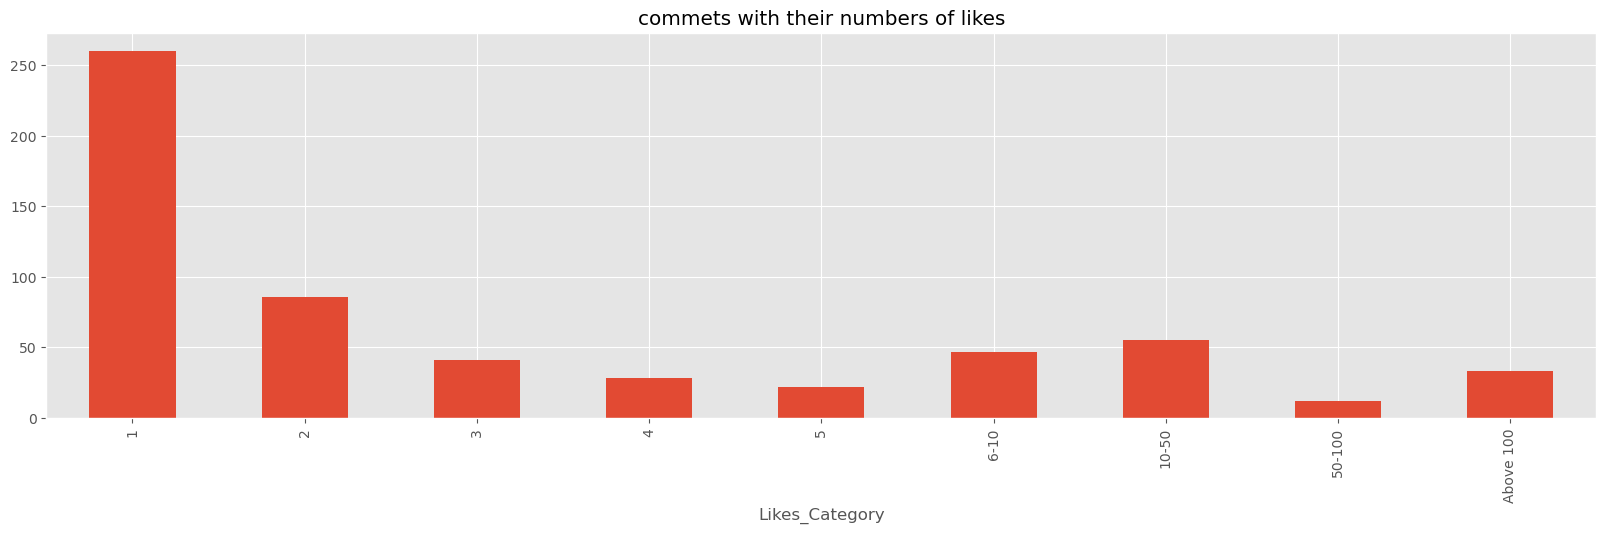

In [55]:
a=comments_df['Likes_Category'].value_counts().sort_index()[1:]
ax = a.plot(kind='bar',
          title='commets with their numbers of likes',
          figsize=(20, 5))


# Show the plot
plt.show()

In [11]:
new_com["Likes"].value_counts().sort_index()

Likes
1       260
2        86
3        41
4        28
5        22
       ... 
2673      1
3218      1
3669      1
4000      1
5275      1
Name: count, Length: 81, dtype: int64

In [12]:
len(comments_df["Likes_Category"]!="0"),len(comments_df["Replies"]!=0)

(2110, 2110)

In [13]:
comments_df["Likes"][0]

0

In [14]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yoga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
ex=new_com["Comments"][1]

In [16]:
tokens=nltk.word_tokenize(ex)

In [17]:
tokens

['I',
 'dream',
 'of',
 'having',
 'my',
 'own',
 'house',
 '.',
 '<',
 'br',
 '>',
 'help',
 'me',
 'realize',
 'my',
 'dream',
 '...',
 '2202206205239390']

In [18]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Yoga\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
tagged=nltk.pos_tag(tokens)
tagged

[('I', 'PRP'),
 ('dream', 'NN'),
 ('of', 'IN'),
 ('having', 'VBG'),
 ('my', 'PRP$'),
 ('own', 'JJ'),
 ('house', 'NN'),
 ('.', '.'),
 ('<', 'CC'),
 ('br', 'JJ'),
 ('>', 'NN'),
 ('help', 'VB'),
 ('me', 'PRP'),
 ('realize', 'VB'),
 ('my', 'PRP$'),
 ('dream', 'NN'),
 ('...', ':'),
 ('2202206205239390', 'CD')]

In [20]:
  nltk.download('maxent_ne_chunker')
  nltk.download('words')



[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Yoga\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Yoga\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [21]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  I/PRP
  dream/NN
  of/IN
  having/VBG
  my/PRP$
  own/JJ
  house/NN
  ./.
  </CC
  br/JJ
  >/NN
  help/VB
  me/PRP
  realize/VB
  my/PRP$
  dream/NN
  .../:
  2202206205239390/CD)


In [22]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yoga\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [24]:
res = {}
for i, row in tqdm(new_com.iterrows(), total=len(new_com)):
    text = row['Comments']
    myid = row['User ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/584 [00:00<?, ?it/s]

In [25]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'User ID'})
vaders = vaders.merge(new_com, how='left')
vaders.head()


,User ID,neg,neu,pos,compound,Comments,Likes,Replies,Likes_Category
0,Christopher Alex,0.0,0.836,0.164,0.7263,This is one of my favorite channel. It alway...,46,19,10-50
1,Picture on lines,0.0,0.846,0.154,0.2500,I dream of having my own house. <br>help me re...,1,0,1
2,Flor Chavez,0.0,1.000,0.000,0.0000,Thank you for sharing is caring god bless you ...,1,0,1
3,Flor Chavez,0.0,1.000,0.000,0.0000,🕊❤️🥰🎉,1,0,1
4,М.Г.М.,0.0,1.000,0.000,0.0000,"Великий человек,надежда человечества,перед ним...",1,0,1


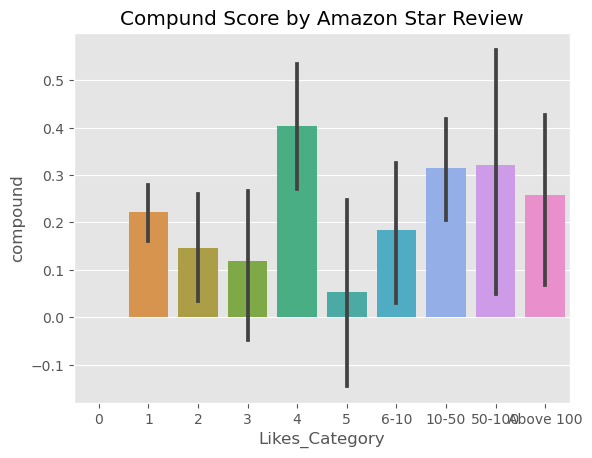

In [26]:
ax = sns.barplot(data=vaders, x='Likes_Category', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

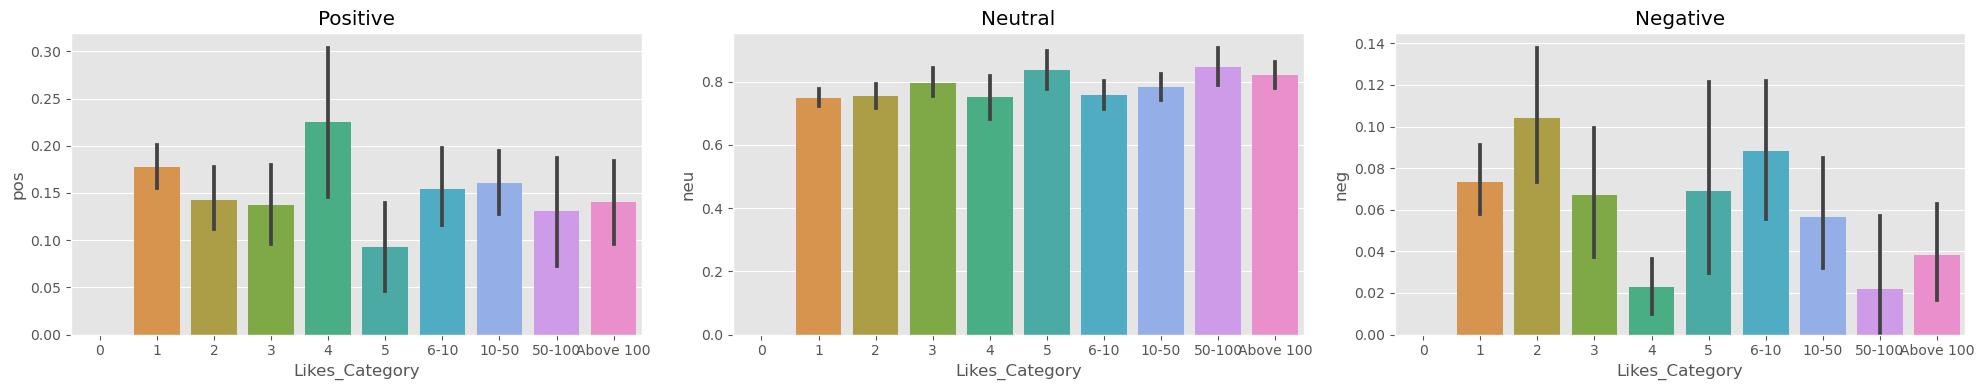

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
sns.barplot(data=vaders, x='Likes_Category', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Likes_Category', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Likes_Category', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [28]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [29]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [32]:
import torch
import os
os.environ["HF_HOME"] = "/path/to/alternate/mirror"

In [34]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [35]:
print(ex)
sia.polarity_scores(ex)

I dream of having my own house. <br>help me realize my dream... 2202206205239390


{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.25}

In [36]:
encoded_text = tokenizer(ex, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0028501141, 'roberta_neu': 0.119673885, 'roberta_pos': 0.877476}


In [37]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [62]:
res = {}
for i, row in tqdm(new_com.iterrows(), total=len(new_com)):
    try:
        text = row["Comments"]
        myid = row["User ID"]
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/584 [00:00<?, ?it/s]

Broke for id elia
Broke for id Wiliams
Broke for id Inspirational Quotes
Broke for id Feuerbringer
Broke for id KILLSWITCH FATE


In [63]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': "User ID"})
results_df = results_df.merge(new_com, how='left')

In [64]:
results_df.columns


Index(['User ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Comments', 'Likes',
       'Replies', 'Likes_Category'],
      dtype='object')

C:\Users\Yoga\anaconda3\envs\main\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


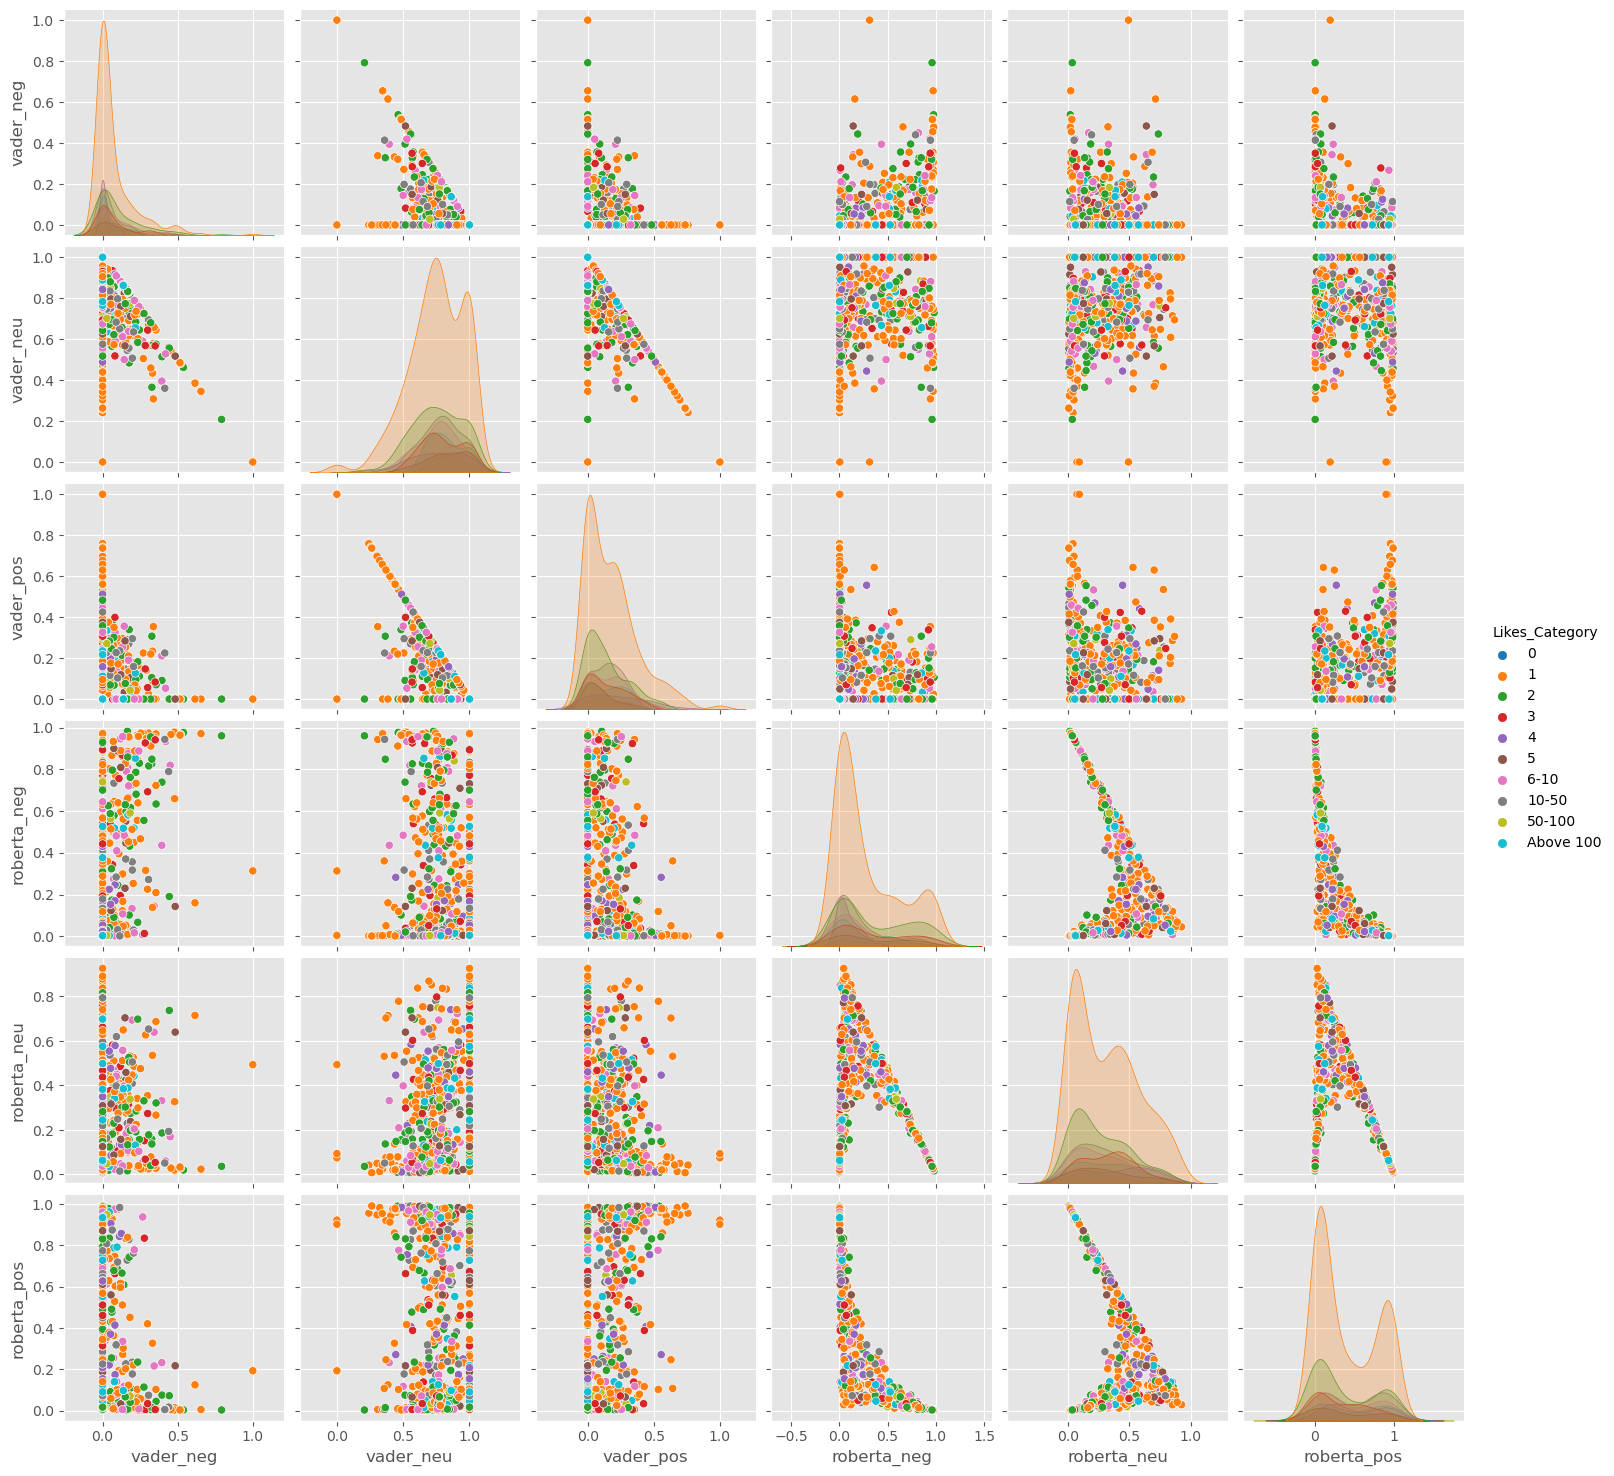

In [65]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Likes_Category',
            palette='tab10')
plt.show()

In [66]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [67]:
sent_pipeline('good boy')

[{'label': 'POSITIVE', 'score': 0.9998503923416138}]

In [68]:
results_df

,User ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Comments,Likes,Replies,Likes_Category
0,Christopher Alex,0.000,0.836,0.164,0.7263,0.002253,0.014254,0.983494,This is one of my favorite channel. It alway...,46,19,10-50
1,Picture on lines,0.000,0.846,0.154,0.2500,0.002850,0.119674,0.877476,I dream of having my own house. <br>help me re...,1,0,1
2,Flor Chavez,0.000,1.000,0.000,0.0000,0.001275,0.020239,0.978485,Thank you for sharing is caring god bless you ...,1,0,1
3,Flor Chavez,0.000,1.000,0.000,0.0000,0.001275,0.020239,0.978485,🕊❤️🥰🎉,1,0,1
4,М.Г.М.,0.000,1.000,0.000,0.0000,0.135448,0.816880,0.047672,"Великий человек,надежда человечества,перед ним...",1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
574,Uroš Damjanović,0.028,0.701,0.271,0.9812,0.003556,0.048378,0.948066,I&#39;ve never considered myself as some talen...,68,1,50-100
575,Selfdeveloped,0.138,0.862,0.000,-0.7477,0.517324,0.385019,0.097657,People don&#39;t understand that when I grew u...,1930,80,Above 100
576,Motivated Mentality,0.000,1.000,0.000,0.0000,0.526409,0.382917,0.090674,If you&#39;re not taking steps forward you&#39...,1685,39,Above 100
577,meto.,0.000,1.000,0.000,0.0000,0.004614,0.056761,0.938625,This man is a legend.,966,18,Above 100
